In [1]:
import os
import sys
import time
import shutil
import logging
import argparse
import yaml
import traceback

import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
pwd

'/atlas/u/kechoi/multi-fairgen/notebooks'

In [4]:
cd ../

/atlas/u/kechoi/multi-fairgen


# What is up with the encodings?

In [62]:
import os
data_dir = '/atlas/u/madeline/multi-fairgen/data/encodings/mnist_subset_same_bkgd/'

In [63]:
split = 'test'
variant = 'biased'

record = np.load(os.path.join(data_dir, 'maf_{}_mnist_{}_z_perc1.0.npz'.format(split, variant)))
zs = record['z']
ys = record['y']
d_ys = record['d_y']

In [64]:
split = 'test'
variant = 'ref'

record = np.load(os.path.join(data_dir, 'maf_{}_mnist_{}_z_perc1.0.npz'.format(split, variant)))
czs = record['z']
cys = record['y']
cd_ys = record['d_y']

In [65]:
all_zs = np.vstack([zs,czs])

In [66]:
all_zs.shape

(4127, 784)

In [67]:
from sklearn.manifold import TSNE

smaller_mnist = TSNE(n_components=2).fit_transform(all_zs)

In [68]:
from sklearn.decomposition import PCA

same_pca_mnist = PCA(n_components=2).fit_transform(all_zs)

In [69]:
all_dys = np.hstack([d_ys, cd_ys])
all_dys.shape

(4127,)

In [70]:
all_dys.sum()

2167

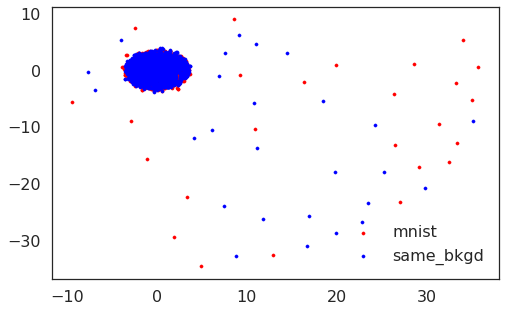

In [17]:
# smaller mnist
plt.figure(figsize=(8,5))
plt.scatter(smaller_mnist[:,0][all_dys==0], smaller_mnist[:,1][all_dys==0], c='red', s=10, label='mnist')
plt.scatter(smaller_mnist[:,0][all_dys==1], smaller_mnist[:,1][all_dys==1], c='blue', s=10, label='same_bkgd')
plt.legend()

In [74]:
np.argsort(same_pca_mnist[:,0])

array([ 759,  777, 3763, ..., 2003, 2442, 3873])

In [77]:
len(same_pca_mnist)

4127

In [76]:
same_pca_mnist[3873]

array([31.72937, 96.15704], dtype=float32)

Text(0.5, 1.0, 'PCA Z-Encodings for Same Bkgd MNIST (perc=1.0)')

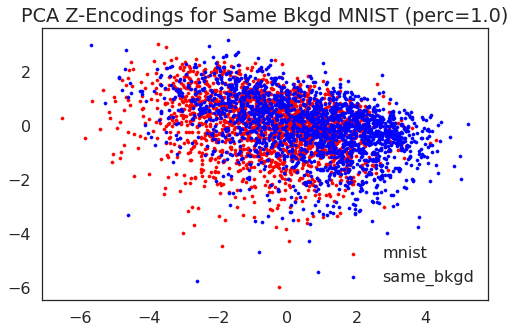

In [81]:
# full sized mnist

# this is a hack where i removed stuff after the very extreme point
plt.figure(figsize=(8,5))
plt.scatter(same_pca_mnist[:3872,0][all_dys[:3872]==0], same_pca_mnist[:3872,1][all_dys[:3872]==0], c='red', s=10, label='mnist')
plt.scatter(same_pca_mnist[:3872,0][all_dys[:3872]==1], same_pca_mnist[:3872,1][all_dys[:3872]==1], c='blue', s=10, label='same_bkgd')
plt.legend()

plt.title('PCA Z-Encodings for Same Bkgd MNIST (perc=1.0)')

# Flipped bkgd

In [87]:
data_dir = '/atlas/u/madeline/multi-fairgen/data/encodings/DigitMNISTSubset/'

In [88]:
split = 'test'
variant = 'biased'

record = np.load(os.path.join(data_dir, 'maf_{}_{}_z_perc1.0.npz'.format(split, variant)))
zs = record['z']
ys = record['y']
d_ys = record['d_y']

In [89]:
split = 'test'
variant = 'ref'

record = np.load(os.path.join(data_dir, 'maf_{}_{}_z_perc1.0.npz'.format(split, variant)))
czs = record['z']
cys = record['y']
cd_ys = record['d_y']

In [90]:
all_zs = np.vstack([zs,czs])

In [91]:
all_dys = np.hstack([d_ys, cd_ys])
all_dys.shape

(4075,)

In [92]:
all_dys.sum()

2115

In [50]:
from sklearn.manifold import TSNE

smaller_mnist = TSNE(n_components=2).fit_transform(all_zs)

In [51]:
from sklearn.decomposition import PCA

pca_mnist = PCA(n_components=2).fit_transform(all_zs)

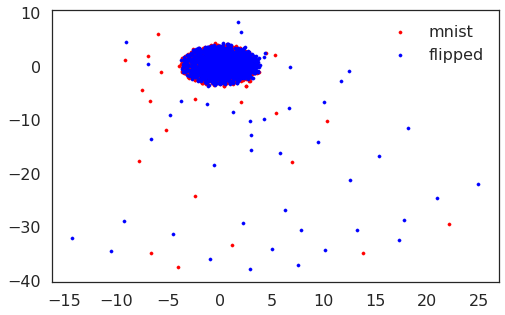

In [58]:
# smaller mnist
plt.figure(figsize=(8,5))
plt.scatter(smaller_mnist[:,0][all_dys==0], smaller_mnist[:,1][all_dys==0], c='red', s=10, label='mnist')
plt.scatter(smaller_mnist[:,0][all_dys==1], smaller_mnist[:,1][all_dys==1], c='blue', s=10, label='flipped')
plt.legend()

Text(0.5, 1.0, 'PCA Z-Encodings for Flipped Bkgd MNIST (perc=1.0)')

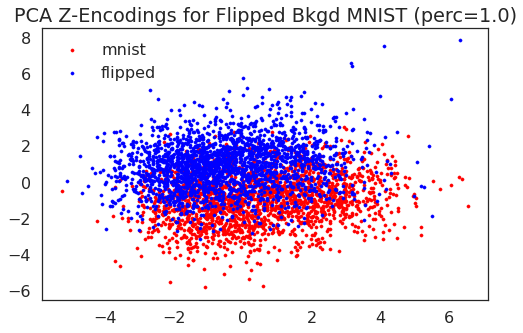

In [93]:
# full sized mnist
plt.figure(figsize=(8,5))
plt.scatter(pca_mnist[:,0][all_dys==0], pca_mnist[:,1][all_dys==0], c='red', s=10, label='mnist')
plt.scatter(pca_mnist[:,0][all_dys==1], pca_mnist[:,1][all_dys==1], c='blue', s=10, label='flipped')
plt.legend()

plt.title('PCA Z-Encodings for Flipped Bkgd MNIST (perc=1.0)')